# Assignmet 4 Matplotlib
#### Name: Pranisaa Charnparttaravanit
#### ID: st121720

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. if instructions are not given, make any assumption you like

import csv file ../resources/company_sales_data.csv

use style seaborn-whitegrid

use subplots  (with any layout you like)

1.1 subplot 1

plot with x as month number, and y as total profit with style circle markers and colored red

title = Company profit per month

put at least one ax/plt.text

x label = month

y label = total profit

#set the ylimit to 100000 to 450000

add guassian fitted line (does not require fill between)

1.2. subplot2

read each product sales and show it using a multiline plot

x label = month

y label = sales units in number

legend on upper center, with columns of 3, set fontsize to 9 using prop params

circle marker; linewidth=3

title = sales data

add one blue dotted line showing the average of all products, with text annotating "average"

1.3. subplot3

plot toothpaste sales data of each using scatter plot

use plt.grid(True, linestyle="--") to show some gridlines  (I did not teach but its not difficult)

x label = month

y label = number of units sold

title = tooth paste sales data

legend = best position

1.4. subplot4

plot bar chart comparing facecream and facewash product sales data

time to check out the documentation :)

since x is comparing two bars, you have to adjust the x slightly for both bars

x label = month

y label = number of units sold

title = facewash and facecream

legend = upper center, column of 2

put some gridlines for easy comparison

to add some flavor, overlay the average of all products on this plot, so we know facecream and facewash is not doing very well!

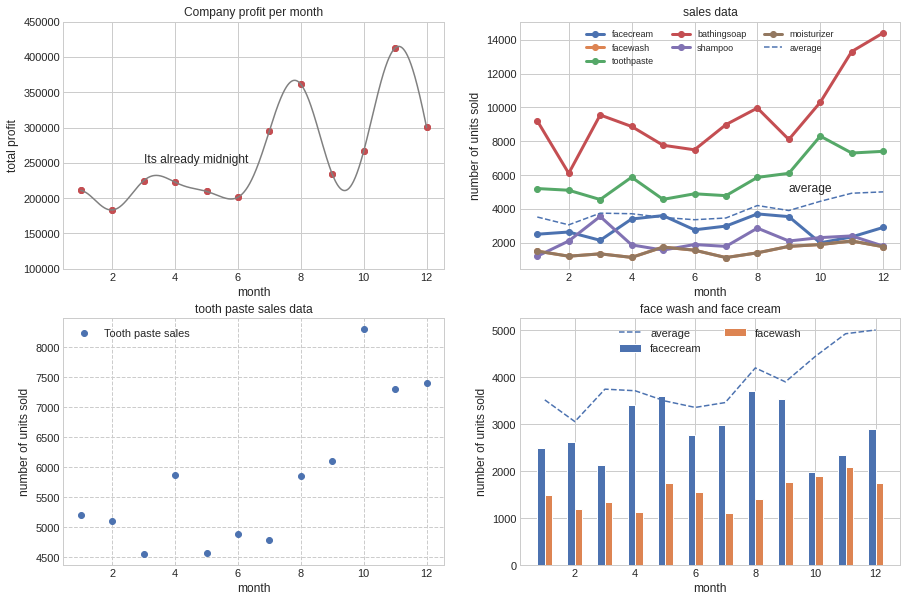

In [112]:
#================Q1================#
df = pd.read_csv('../resources/company_sales_data.csv',dtype=float)
df.head()

###############1.1.subplot1#################

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(2,2,figsize=(15, 10))

# plot with x as month number, and y as total profit with style circle markers and colored red
x = df['month_number']
y = df['total_profit']

ax1 = ax[0,0]

ax1.plot(x,y,'or')
ax1.set(xlabel ='month',ylabel ='total profit',title='Company profit per month',ylim = [100000,450000])
ax1.text(3,250000,'Its already midnight')

# add guassian fitted line (does not require fill between)
from sklearn.gaussian_process import GaussianProcessRegressor as GP
gp = GP().fit(x[:,np.newaxis],y) #gp knows the distribution

xfit=np.linspace(1,12,1000) #test data

yfit,sigma =gp.predict(xfit[:,np.newaxis], return_std = True)
dyfit = 1.96* sigma

ax1.plot(x,y,'or')
ax1.plot(xfit,yfit,c='grey')

###############1.2.subplot2#################
ax2 = ax[0,1]

for i in range(1,len(df.columns)-2):
    ax2.plot(df['month_number'],df.iloc[:,i],'-o',linewidth=3,label = df.columns[i])
ax2.plot(df['month_number'],df.iloc[:,1:7].mean(axis=1),'--b',label = 'average')
ax2.annotate('average',xy = (9,5000))
ax2.set(xlabel ='month',ylabel ='number of units sold', title = 'sales data')
ax2.legend(loc='upper center', ncol=3, prop={'size': 9})

###############1.3.subplot3#################
x = df['month_number']
y = df['toothpaste']

ax3 = ax[1,0]

ax3.scatter(x,y,label="Tooth paste sales")
ax3.grid(True, linewidth= 1, linestyle="--")
ax3.set(xlabel = 'month', ylabel = 'number of units sold', title ='tooth paste sales data')
ax3.legend(loc='best')

###############1.4.subplot4#################

ax4 = ax[1,1]
y1 = df['facecream']
y2 = df['facewash']
x = df['month_number']

ax4.bar(x-0.25,y1,label = 'facecream', width= 0.25,align = 'edge')
ax4.bar(x,y2,label = 'facewash', width= 0.25,align = 'edge')
ax4.plot(df['month_number'],df.iloc[:,1:7].mean(axis=1),'--b',label = 'average')
ax4.set(xlabel = 'month', ylabel = 'number of units sold', title ='face wash and face cream')
ax4.legend(loc ='upper center', ncol=2)
ax4.grid(True)

2. Continue from above


Create a separate histogram plot showing distribution of profit range with this range profit_range = [150000, 175000, 200000, 225000, 250000, 300000, 350000]

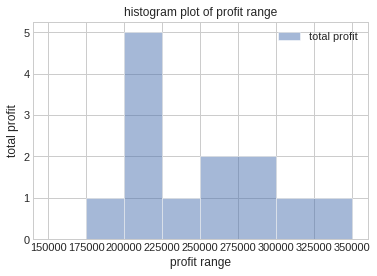

In [113]:
#================Q2================#
y = df['total_profit']
fig, ax = plt.subplots(1,1)
profit_range = [150000, 175000, 200000, 225000, 250000, 300000, 350000]
ax.hist(y, profit_range,alpha=0.5, label='total profit')
ax.set(xlabel = 'profit range', ylabel = 'total profit', title ='histogram plot of profit range')
ax.legend(loc ='best')

3. let's try to perform a linear regression on the profit, with x = month and y = total profit

plot the actual values using scatter

plot the fitted line, along with error bar where yerr = yactual - ypred

instead of using gp, use sckitlearn.LinearRegression

last, print the R^2 with 3 significant digits (e.g., 0.502)and write it on any place on the graph

Coefficient of determination: 0.503


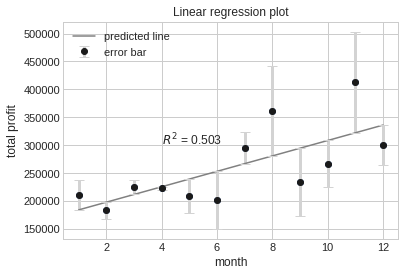

In [114]:
#================Q3================#
x = df['month_number']
y = df['total_profit']
plt.scatter(x,y)

# add guassian fitted line (does not require fill between)
from sklearn.linear_model import LinearRegression as LR
lr = LR().fit(x[:,np.newaxis],y) #gp knows the distribution
xfit=np.linspace(1,12,12) #test data
ypred =lr.predict(xfit[:,np.newaxis])

dy = y - ypred
plt.plot(xfit,ypred,c='grey', label = 'predicted line')
plt.errorbar(x,y, yerr = dy,  fmt = 'ok', ecolor = 'lightgrey', elinewidth =3, capsize =5, label='error bar')
plt.xlabel('month')
plt.ylabel('total profit')
plt.title('Linear regression plot')
plt.legend(loc='best')

from sklearn.metrics import r2_score
plt.text(4,300000,f"$R^2$ = {r2_score(y, ypred):.3f}")
print('Coefficient of determination: %.3f'
      % r2_score(y, ypred))

4.  Apply K means library from sklearn with n_clusters=4, and plot a scatter plot with colors based on their grouping.
also plot the centers using cluster_centers_

Plot applying kmeans


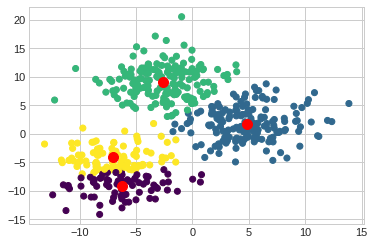

In [115]:
#================Q4================#
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=3,
                       cluster_std=3, random_state=42)

plt.scatter(X[:,0],X[:,1],alpha=0.2,c=y_true,cmap='viridis')
# print(y_true)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_ 

print("Plot applying kmeans")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1)
plt.grid(True)

5. apply ridge regression with degrees, 1 to 5 and plot using these x and f(x)

print their r^2 on the graph

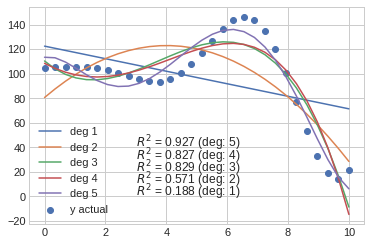

In [116]:
#================Q5================#
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 30)
X = x[:, np.newaxis]
y = x**2 * np.cos(x) + 105

# degrees = [1,2,3,4,5]
# for i in degrees:
#     poly = PolynomialFeatures(i)
#     plt = Ridge(,y)

plt.scatter(x, y, label="y actual")

for ix, deg in enumerate([1, 2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(deg), Ridge())
    model.fit(X, y)
    y_preds = model.predict(X)
    plt.text(3, ix*10, f"$R^2$ = {model.score(X, y):.3f} (deg: {deg}) ")
    plt.plot(x, y_preds,label="deg %d" % deg)

plt.legend()
plt.grid(True)


6. predit using LogisticRegression

to add some flavor, learn how to plot the decision boundary using plt.pcolormesh

in order to generate Z for input to plt.pcolormesh, use np.meshgrid which will generate all possible x and y

Text(0.5, 1.0, 'Logistic regression on iris dataset')

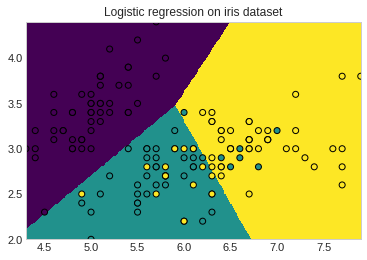

In [117]:
#================Q6================#
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target  #3 classes

# Z = np.meshgrid(x,y)


model = LogisticRegression().fit(X, y)

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# print(xx)

Z = model.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap="viridis")

#plot the actual points, with color specifying the actual y class
plt.scatter(X[:, 0], X[:, 1], c=y,edgecolor='black', cmap="viridis")
plt.title("Logistic regression on iris dataset")


7. this one is simple, seaborn has a very useful pairplot function

first understand why pairplot is useful - write one or two short sentences

then attempt to apply pairplot with the iris dataset

reminder to check what pairplot accepts, so you can prepare the data in that correct format

you may also want to read what sklearn return for dataset

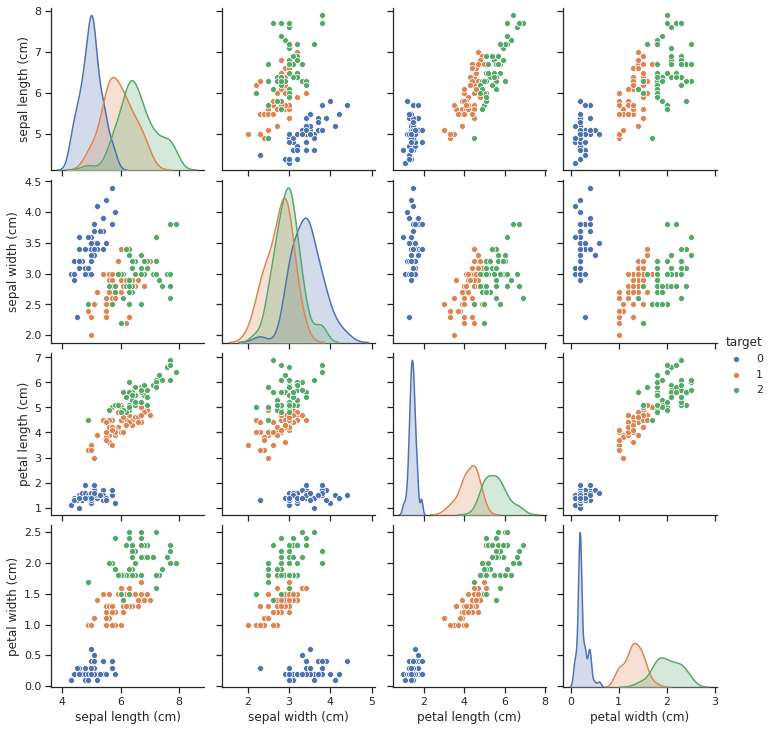

In [118]:
#================Q7================#
from sklearn.datasets import load_iris
import seaborn as sns 
data = load_iris()
data.data
data.feature_names
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = pd.Series(data.target)
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,kind="scatter", hue="target")
# sns.grid()

8. Make a scatter plot with histograms above and right of the scatter plot along with the cdf curve (Hint: use hist-type(step))

Next, find the correlation and p-value using pearson correlation, and print the results on the graph

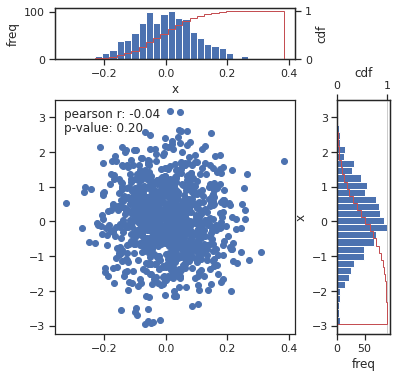

In [119]:
#================Q8================#
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gs
import numpy as np

mu, sigma = 0, 0.1 # mean and standard deviation
np.random.seed(42)
x = np.random.normal(mu, sigma, 1000)
y = np.random.randn(1000)


fig = plt.figure(figsize= (6,6))
grid = plt.GridSpec(4,4,hspace =0.8,wspace = 0.8)
main_scatter = plt.subplot(grid[1:,:-1])
histx = plt.subplot(grid[0,:-1],sharex=main_scatter) #,xticklabels =[], sharey = main_ax)
histy = plt.subplot(grid[1:,-1],sharey=main_scatter)


main_scatter.scatter(x,y)
histx.hist(x,bins = 30)
histxcdf = histx.twinx()
histxcdf.hist(x,bins = 30,cumulative=1,histtype='step',density = True,color='r')
histy.hist(y,bins=30,orientation='horizontal')
histycdf = histy.twiny()
histycdf.hist(y,bins=30,orientation='horizontal',cumulative=-1,histtype='step',density = True,color='r')

histx.set(xlabel ='x',ylabel='freq')
histxcdf.set(ylabel ='cdf')
histy.set(xlabel ='freq',ylabel='x',)
histycdf.set(xlabel ='cdf')

from scipy import stats
r, p = stats.pearsonr(x, y)

main_scatter.text(-0.33, 3, f"pearson r: {r:.2f}")
main_scatter.text(-0.33, 2.6, f"p-value: {p:.2f}")
plt.grid(True)
# plt.show()

9. Boxplot is commonly used in academic settings due to its compact format but with abundant information

Attempt to create a boxplot of total_bills by days based on this dataset

to add some challenge, attempt to add a scatterplot on top of the boxplot

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]


Text(0, 0.5, 'Total Bill')

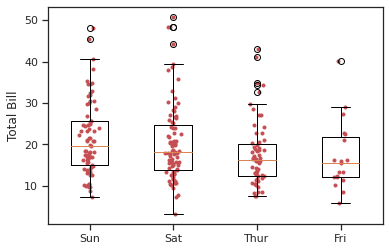

In [120]:
#================Q9================#
import os

os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'
import seaborn as sns
df = sns.load_dataset('tips')  #return pd dataframe

days = df['day'].unique()
print(days)

dfs = []  
for ix, day in enumerate(days):
    day_df = df.loc[df['day'] == day, 'total_bill']  #shape (n_samples, )
#     print(day_df)

    dfs.append(day_df)

    x = np.random.normal(ix+1, 0.04, size=len(day_df))
    plt.plot(x, day_df, 'r.', alpha=1)
    
plt.boxplot(dfs, labels=days)
plt.ylabel("Total Bill")


10. Common task is to initially compare machine learning algorithms as a spot checking process before fine-tuning hypteramaters

Here we gonna use boxplot to compare the algorithms based on accuracy

Note that there are many metrics you can use to compare algorithms, and not only accuracy that matters, e.g., time, learning curves, etc.

Also note that it is silly to consider this result done. This is simply an exploratory process to check which model is viable, before fine-tuning

- perform classification based on what we have imported
- then plot the results using boxplot

LR: 0.938218 (0.031545)
LDA: 0.915403 (0.028372)
KNN: 0.960493 (0.023234)
DT: 0.834699 (0.038296)
NB: 0.759066 (0.055416)
SVM: 0.967148 (0.016632)


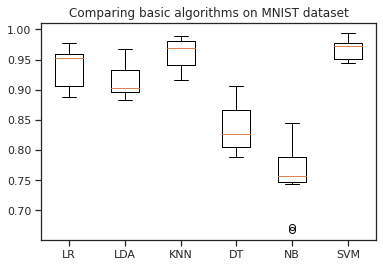

In [121]:
#================Q10================#
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import os

os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

# load dataset
digits = datasets.load_digits()
# digits

#most distanced based algorithms benefit from normalizing with mean 0 and unit std
scaler = StandardScaler()
X = scaler.fit(digits.data).transform(digits.data)
y = digits.target

# model preparation
models = []
models.append(('LR', LogisticRegression(multi_class="multinomial", max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluation of each model
results = []
names = []
scoring = 'accuracy'
for name, model in models: 
    kfold = model_selection.KFold(n_splits=10, random_state=None)

    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
plt.boxplot(results, labels=names)
plt.title("Comparing basic algorithms on MNIST dataset")
plt.show()


11. Given two simple 2D vectors 'u' and 'v'. Represent them vectors as arrows.

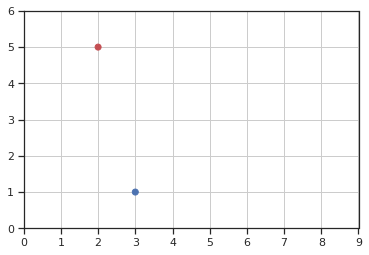

In [122]:
#================Q11================#
u = np.array([2, 5])
v = np.array([3, 1])

x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

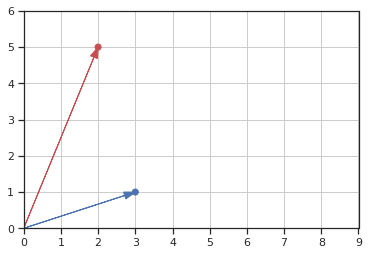

In [123]:
#represent these vectors as arrows

x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.arrow(0,0,x_coords[0],y_coords[0],head_width =0.2, head_length =0.3, length_includes_head=True,color = 'r')
plt.arrow(0,0,x_coords[1],y_coords[1],head_width =0.2, head_length =0.3, length_includes_head=True,color='b')
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

12. Given two simple 3D vectors 'a' and 'b'. Attempt to plot the 3d vectors

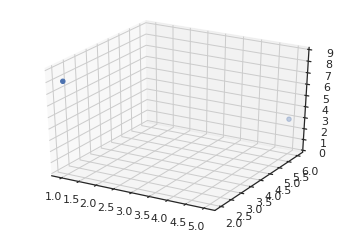

In [124]:
#================Q12================#
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

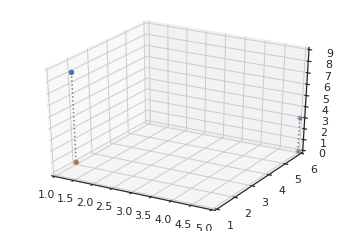

In [125]:
#attempt to plot the 3d vectors
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)

def plot3d(x_coords, y_coords,z_coords,z0):
        subplot3d.scatter(x_coords, y_coords, z_coords)
        subplot3d.scatter(x_coords,y_coords, z0,'grey')
        for i in range(len(x_coords)):
            plt.plot([x_coords[i],x_coords[i]],[y_coords[i],y_coords[i]],[z_coords[i],z0], color="grey", linestyle='dotted', marker=".")
        subplot3d.set_zlim3d([0, 9])
        subplot3d.axis([1, 5, 1, 6])
        
plot3d(x_coords,y_coords,z_coords,0)

13. We have already seen that vectors can been represented as points or arrows in N-dimensional space. Is there a good graphical representation of matrices? Well you can simply see a matrix as a list of vectors, so plotting a matrix results in many points or arrows. For example, let's create a $2 \times 4$ matrix `P` and plot it as points:

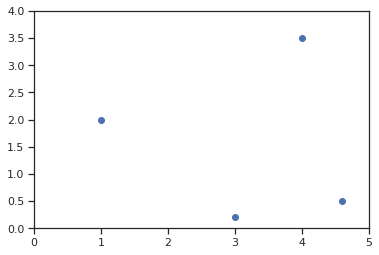

In [126]:
#================Q13================#
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

Of course we could also have stored the same 4 vectors as row vectors instead of column vectors, resulting in a $4 \times 2$ matrix (the transpose of $P$, in fact). It is really an arbitrary choice.

Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:

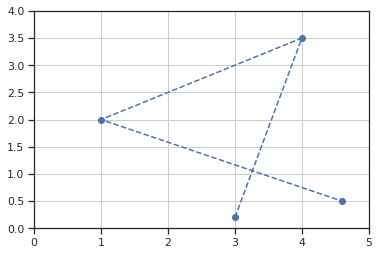

In [127]:
plt.plot(x_coords_P, y_coords_P, "bo")  #point
plt.plot(x_coords_P, y_coords_P, "b--") #line
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Or you can represent it as a polygon: matplotlib's `Polygon` class expects an $n \times 2$ NumPy array, not a $2 \times n$ array, so we just need to give it $P^T$:

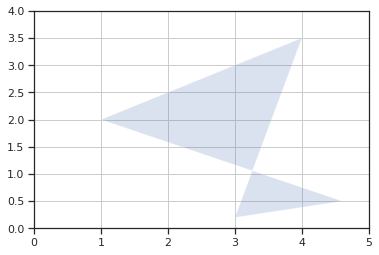

In [128]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Now, imagine this following transformations:

In [129]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])

#1. addition
P_add = P + H

#2. scalar multiplication
P_scalar = 0.60 * P

angle30 = 30 * np.pi / 180  # angle in radians
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])

#3 dot product
P_rotate =  V.dot(P)

def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

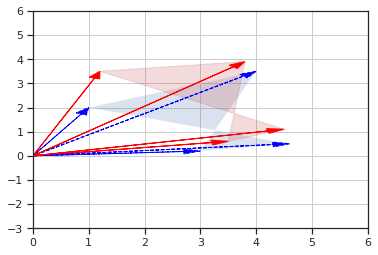

In [130]:
plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_add.T, alpha=0.2,color='r'))
for vector_before, vector_after in zip(P.T, P_add.T):
        plot_vector2d(vector_before, color="blue", linestyle="--")
        plot_vector2d(vector_after, color="red", linestyle="-")
plt.axis([0, 6, -3, 6])
plt.grid()
plt.show()

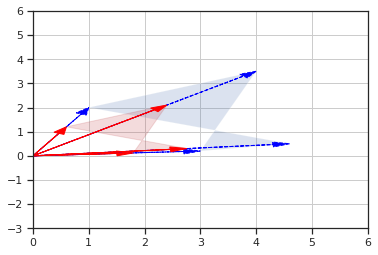

In [131]:
plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_scalar.T, alpha=0.2,color='r'))
for vector_before, vector_after in zip(P.T, P_scalar.T):
        plot_vector2d(vector_before, color="blue", linestyle="--")
        plot_vector2d(vector_after, color="red", linestyle="-")
plt.axis([0, 6, -3, 6])
plt.grid()
plt.show()

Please kindly plot the transformations and understand how each matrix operation is actually simply moving the shapes.

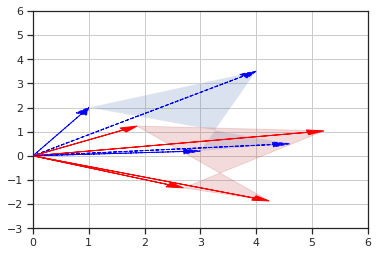

In [132]:
plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_rotate.T, alpha=0.2,color='r'))
for vector_before, vector_after in zip(P.T, P_rotate.T):
        plot_vector2d(vector_before, color="blue", linestyle="--")
        plot_vector2d(vector_after, color="red", linestyle="-")
plt.axis([0, 6, -3, 6])
plt.grid()
plt.show()